# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/christophervolk/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


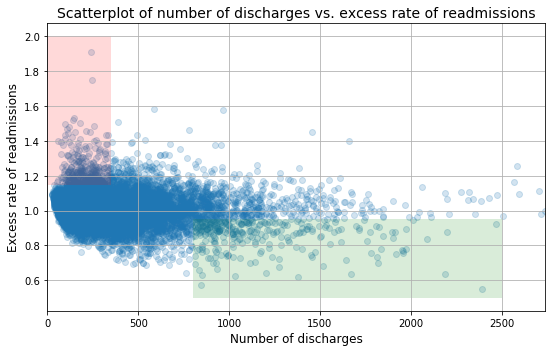

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

A.  I agree with that portion of the analysis that states that hospitals that discharge their patients at a higher rate have fewer readmissions.  This point is essentially true, but the preliminary analysis may oversimplify this a bit and does not go into causative factors.  It does not adequately explain why higher numbers of discharges generally correspond to lower readmission rates.

B.  After examining the dataset as a whole, I created a more focused version of the dataset that omitted outliers and the first 81 zero values in the Number of Discharges column which yielded NaN values for the Excess Readmission Ratio.  This more focused dataset was also used in the preliminary analysis above to generate the scatterplot. Therefore, a better analysis should naturally begin from this point.  

  The statistical results obtained here were very close to those obtained in the preliminary analysis:
  
* In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
* In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.979 and 45% have excess readmission rate greater than 1 (differing from the above preliminary analysis by only 0.001 and 1%, respectively)

I then used a permutation test to determine whether the observed Excess Readmission Ratio for low discharge hospitals could have been higher than for high discharge hospitals by chance.  The p-value indicated otherwise (0.000) since it was well below the $\alpha$ value of 0.01, and thus the null hypothesis could be rejected.  
  
  In order to test the strength of this conclusion, I ran a correlation function over the Number of Discharges and Excess Readmission Ratio and obtained a correlation coefficient of -0.0930955428759.  Thus, the inverse relationship between the two variables was correctly indicated, as in the preliminary report, but the strength of this relationship appears to have been overstated.  
  
  I also ran a bootstrap test to determine whether the predicted number of readmissions used in the formula for the Excess Readmission Ratio was reliable based on the number of actual readmissions observed. I obtained a high p-value of 0.9999 and so failed to reject the null hypothesis that the mean predicted value was the same as the mean observed value, i.e., the predicted number of readmissions used in the formula appeared to have been supported by the observed values.  
  
  Thus, statistical and practical signficance differ here.  Although the stated relationship between Number of Discharges and the Excess Readmission Ratio is as stated, it is not a terribly strong relationship. Patients are discharged for any number of reasons.  On the one hand, hospitals with high numbers of discharges may indicate the conclusion of successful treatment for many of their patients, rendering readmission unnecessary.  Those patients who are not discharged and remain in the hospital for too long may be at risk of contracting other illnesses such as MERSA, and so those hospitals which do not discharge as often may have a higher Excess Readmission Ratio. On the other hand, if a hospital discharges its patients prematurely, they may also experience a high number of readmissions.  Therefore, merely incentivizing hospitals to have a high number of discharges is likely not an adequate solution and may even lead to premature discharges.  
  
  However, I agree with the preliminary analysis' statement that "Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions", and with its recommendation that "Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation." By emphasizing quality care at overburdened hospitals, the number of discharges will likely increase naturally as a result of successful conclusion of treatment, and the Excess Readmission Ratio will then decrease accordingly.  
  
  Finally, the scatterplot in the preliminary analysis was concise, but the alpha level could have been reduced to provide greater transparency, as the number of overlapping points made distinguishing individual data points more difficult, as they appeared to coalesce into a blob toward the middle of the plot.  Additionally, providing a clear demarcation line at Excess Readmission Ratio = 1 would have been more clear than using the red and green boxes as was done above. I have provided such a plot below (although even with a reduced alpha, some coalescing of points was unavoidable).  

In [5]:
#Examine dataset as a whole
clean_hospital_read_df.info()
clean_hospital_read_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [6]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


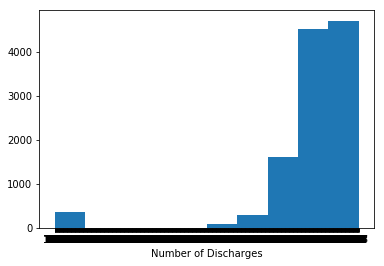

,Number of Discharges,Excess Readmission Ratio
8126,2716,0.9804
6643,2740,1.0003
1892,3570,1.0896
13615,3980,0.7682
13666,6793,0.7379


In [7]:
#Examine items left out of the x and y values used in the scatterplot above--these are outliers,
#as demonstrated by shape of histogram below and the large discrepancy between mean and median of 
#Number of Discharges (362.9 v. 280).  

plt.hist(clean_hospital_read_df[['Number of Discharges']])
plt.xlabel("Number of Discharges")
plt.show()

clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].tail()

In [8]:
#Examine first few values with entries (First 81 entries have 0 values for discharges)
clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].iloc[81:].head()

,Number of Discharges,Excess Readmission Ratio
1832,25,1.0914
1699,27,1.0961
1774,28,1.0934
1853,29,1.0908
1290,30,1.1123


In [9]:
#Abbreviated dataset to exclude outliers and zero values for which there is no ratio data.
clean_hosp_abbr = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions']][81:-3]

#Groups of low and high discharge counts as defined above
low_discharge_obs = clean_hosp_abbr[clean_hosp_abbr['Number of Discharges'] < 100]['Excess Readmission Ratio']

high_discharge_obs = clean_hosp_abbr[clean_hosp_abbr['Number of Discharges'] > 1000]['Excess Readmission Ratio']

print("Mean low discharge Excess Readmission Rate: {0:.3f}".format(np.mean(low_discharge_obs)))
print("Mean high discharge Excess Readmission Rate: {0:.3f}".format(np.mean(high_discharge_obs)))

percent_low_discharge = low_discharge_obs[low_discharge_obs > 1].count()/len(low_discharge_obs) * 100

percent_high_discharge = high_discharge_obs[high_discharge_obs > 1].count()/len(high_discharge_obs) * 100

print("Percent low discharge Excess Readmission Rate greater than 1: ", np.round(percent_low_discharge))
print("Percent high discharge Excess Readmission Rate greater than 1: ", np.round(percent_high_discharge))


Mean low discharge Excess Readmission Rate: 1.023
Mean high discharge Excess Readmission Rate: 0.979
Percent low discharge Excess Readmission Rate greater than 1:  63.0
Percent high discharge Excess Readmission Rate greater than 1:  45.0


In [10]:
#Null hypothesis--There is no difference in mean Excess Readmission Ratio between hospitals with low numbers of discharges and those with high numbers
from scipy import stats

#Set alpha
a = 0.01

#Permutation test for mean readmission ratios for high and low discharge hospitals
np.random.seed(7)

#Define permutation functions
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean ratio observed: empirical_diff_means
empirical_diff_means = diff_of_means(low_discharge_obs, high_discharge_obs)


# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(low_discharge_obs, high_discharge_obs, diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)


print('p-value ={0:.3f}'.format(p))

if p < a:
    print("Reject null hypothesis.  The number of discharges has an effect on the Excess Readmissions Ratio.")
else:
    print("Fail to reject null hypothesis. The number of discharges likely has no effect on the Excess Readmissions Ratio.")
    


p-value =0.000
Reject null hypothesis.  The number of discharges has an effect on the Excess Readmissions Ratio.


In [11]:
#Compare Number of Discharges to Excess Readmission Ratio to get direction and strength of effect
#Generate correlation matrix
clean_hosp_abbr[['Number of Discharges', 'Excess Readmission Ratio']].corr()


,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.093096
Excess Readmission Ratio,-0.093096,1.000000


In [12]:
#Small negative correlation--direction supported by results of preliminary report, but not strength
print("Correlation coefficient: ", clean_hosp_abbr[['Number of Discharges', 'Excess Readmission Ratio']].corr().iloc[0, 1])

Correlation coefficient:  -0.0930955428759


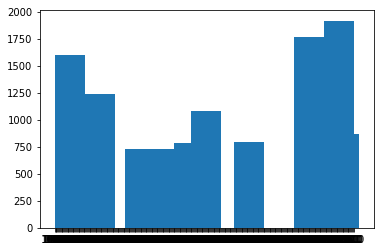

In [13]:
#Determine strength of predicted readmissions v. actual readmissions

#Determine if number of readmissions is normally distributed--is T-Test appropriate?
#It is not, so T-Test not appropriate here
plt.hist(clean_hosp_abbr[['Number of Readmissions']])
plt.show()

In [14]:
#Bootstrap test to determine strength of predicted readmissions v. actual readmissions

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


np.random.seed(7)

#Mean predicted value
mean_predicted_readmit = np.mean(clean_hosp_abbr['Predicted Readmission Rate'])

translated_readmit = (clean_hosp_abbr['Number of Readmissions']/36) - np.mean(clean_hosp_abbr['Number of Readmissions']/36) + mean_predicted_readmit

#Bootstrap mean actual number of readmissions
#Dividing actual number by 36 months to account for 3 year period in order to get same period (30 days) as the predicted rate
bs_num_readmit = draw_bs_reps(translated_readmit, np.mean, size=10000)

a = 0.01

p = (np.sum(bs_num_readmit < mean_predicted_readmit) + np.sum(bs_num_readmit > mean_predicted_readmit))/len(bs_num_readmit)

print('p-value =', p)

if p < a:
    print("Reject null hypothesis.  The predicted number of readmissions does not reflect the actual number of readmissions.")
else:
    print("Fail to reject null hypothesis. The predicted number of readmissions does reflect the actual number of readmissions.")
    

p-value = 0.9999
Fail to reject null hypothesis. The predicted number of readmissions does reflect the actual number of readmissions.


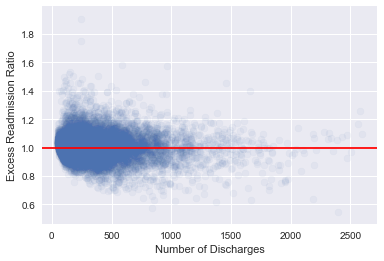

In [15]:
import seaborn as sns

sns.set()

x = [a for a in clean_hosp_abbr['Number of Discharges'][81:-3]]
y = list(clean_hosp_abbr['Excess Readmission Ratio'][81:-3])


plt.scatter(x, y, alpha=0.055)
plt.axhline(y=1, color='r', linestyle='-')
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.show()

